Vamos usar a biblioteca Pandas para analisar algumas estatísticas dos dados que criamos. Aqui estão alguns exemplos de análises estatísticas que podemos realizar:

In [1]:
import pandas as pd
import sqlite3

# Ler o banco de dados
nome_banco_de_dados = 'banco_de_dados.db'
conexao = sqlite3.connect(nome_banco_de_dados)
query = 'SELECT * FROM exemplo'
df = pd.read_sql(query, conexao)

# Exibir um resumo estatístico básico das colunas numéricas
resumo = df.describe()
print(resumo)

              id      idade
count  43.000000  43.000000
mean   22.000000  31.279070
std    12.556539   5.521928
min     1.000000  22.000000
25%    11.500000  28.000000
50%    22.000000  30.000000
75%    32.500000  34.500000
max    43.000000  45.000000


Este código irá gerar um resumo estatístico básico das colunas numéricas, incluindo contagem, média, desvio padrão, mínimo e máximo.

Contagem de registros por gênero:

In [2]:
# Contar quantos registros existem por gênero
contagem_genero = df['genero'].value_counts()
print(contagem_genero)

Masculino    22
Feminino     21
Name: genero, dtype: int64


Isso contará quantos registros existem para cada valor único na coluna 'genero'.

Média de idade por gênero:

In [3]:
# Calcular a média de idade para cada gênero
media_idade_genero = df.groupby('genero')['idade'].mean()
print(media_idade_genero)

genero
Feminino     29.142857
Masculino    33.318182
Name: idade, dtype: float64


Isso calculará a média de idade para cada categoria única na coluna 'genero'.

Contagem de registros por faixa etária:

In [4]:
# Criar categorias de faixa etária
faixas_etarias = pd.cut(df['idade'], bins=[20, 30, 40, 50], labels=['20-29', '30-39', '40-49'])

# Contar quantos registros estão em cada faixa etária
contagem_faixa_etaria = faixas_etarias.value_counts()
print(contagem_faixa_etaria)

20-29    23
30-39    16
40-49     4
Name: idade, dtype: int64


Este código criará categorias de faixa etária e contará quantos registros estão em cada faixa.

Idade média e mediana:

In [5]:
# Calcular a idade média e mediana dos registros
idade_media = df['idade'].mean()
idade_mediana = df['idade'].median()

print(f'Idade Média: {idade_media:.2f}')
print(f'Idade Mediana: {idade_mediana}')

Idade Média: 31.28
Idade Mediana: 30.0


Essa análise calcula a idade média e a idade mediana dos registros na coluna 'idade'.

Contagem de registros por e-mail de domínio:

In [6]:
# Extrair o domínio dos endereços de e-mail e contar a frequência de cada domínio
df['dominio_email'] = df['email'].str.split('@').str[1]
contagem_dominio_email = df['dominio_email'].value_counts()
print(contagem_dominio_email)

email.com    43
Name: dominio_email, dtype: int64


Isso contará quantos registros existem para cada domínio de e-mail presente na coluna 'email'

Idade máxima por gênero:

In [7]:
# Encontrar a idade máxima para cada gênero
idade_maxima_genero = df.groupby('genero')['idade'].max()
print(idade_maxima_genero)

genero
Feminino     40
Masculino    45
Name: idade, dtype: int64


Isso mostrará a idade máxima para cada categoria única na coluna 'genero'.

Correlação entre idade e telefone:

In [ ]:
# Calcular a correlação entre as colunas 'idade' e 'telefone' (não faz sentido na prática, apenas um exemplo)
correlacao_idade_telefone = df['idade'].corr(df['telefone'].str.replace('-', '').astype(int))
print(f'Correlação entre Idade e Telefone: {correlacao_idade_telefone:.2f}')

Contagem de registros por idade:

In [9]:
# Contar quantos registros existem para cada idade
contagem_idade = df['idade'].value_counts()
print(contagem_idade)

29    6
28    5
35    4
31    3
32    3
27    3
30    3
22    2
45    2
33    2
26    2
42    1
40    1
38    1
41    1
25    1
34    1
36    1
23    1
Name: idade, dtype: int64


Isso contará quantos registros existem para cada valor único na coluna 'idade'.

Maior e menor idade:

In [10]:
# Encontrar a maior e a menor idade nos registros
idade_maxima = df['idade'].max()
idade_minima = df['idade'].min()

print(f'Maior Idade: {idade_maxima}')
print(f'Menor Idade: {idade_minima}')

Maior Idade: 45
Menor Idade: 22


Essa análise identifica a maior e a menor idade presente nos dados.

Contagem de registros por gênero e faixa etária:

In [11]:
# Criar categorias de faixa etária
faixas_etarias = pd.cut(df['idade'], bins=[20, 30, 40, 50], labels=['20-29', '30-39', '40-49'])

# Contar quantos registros estão em cada faixa etária para cada gênero
contagem_genero_faixa_etaria = df.groupby(['genero', faixas_etarias])['idade'].count().unstack()
print(contagem_genero_faixa_etaria)

idade      20-29  30-39  40-49
genero                        
Feminino      14      7      0
Masculino      9      9      4


Isso mostra a contagem de registros em cada faixa etária para cada gênero.

Porcentagem de registros por gênero:

In [ ]:
# Calcular a porcentagem de registros para cada gênero
porcentagem_genero = df['genero'].value_counts(normalize=True) * 100
print(porcentagem_genero)

Isso calcula a porcentagem de registros para cada categoria única na coluna 'genero'.

Claro, vamos continuar com mais análises dos dados:

Contagem de registros por domínio de e-mail e gênero:

In [12]:
# Contar quantos registros existem para cada domínio de e-mail para cada gênero
contagem_dominio_email_genero = df.groupby(['genero', 'dominio_email'])['idade'].count().unstack()
print(contagem_dominio_email_genero)

dominio_email  email.com
genero                  
Feminino              21
Masculino             22


Esta análise mostra quantos registros existem para cada domínio de e-mail, separados por gênero.

Média de idade por faixa etária e gênero:

In [13]:
# Calcular a média de idade para cada faixa etária e gênero
media_idade_faixa_etaria_genero = df.groupby([faixas_etarias, 'genero'])['idade'].mean().unstack()
print(media_idade_faixa_etaria_genero)

genero   Feminino  Masculino
idade                       
20-29   26.714286  28.333333
30-39   34.000000  33.888889
40-49         NaN  43.250000


Isso calcula a média de idade para cada combinação de faixa etária e gênero.

Quantidade de registros por gênero e estado civil:

In [ ]:
# Suponhamos que exista uma coluna 'estado_civil' em seus dados
contagem_genero_estado_civil = df.groupby(['genero', 'estado_civil'])['idade'].count().unstack()
print(contagem_genero_estado_civil)

Esta análise mostrará a quantidade de registros para cada combinação de gênero e estado civil (supondo que exista uma coluna 'estado_civil' em seus dados).

Histograma de idades:

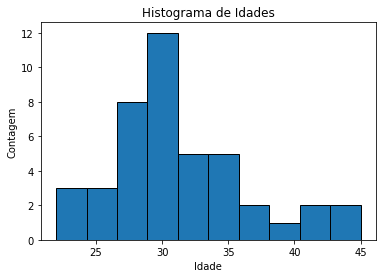

In [ ]:
import matplotlib.pyplot as plt

# Gerar um histograma das idades
plt.hist(df['idade'], bins=10, edgecolor='k')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Histograma de Idades')
plt.show()

Isso criará um histograma das idades para visualizar a distribuição das idades nos seus dados.

Essas análises adicionais permitem explorar mais profundamente seus dados e obter insights específicos com base em diferentes variáveis.

Contagem de registros por gênero e categoria de renda:

In [ ]:
# Suponhamos que exista uma coluna 'categoria_renda' em seus dados
contagem_genero_categoria_renda = df.groupby(['genero', 'categoria_renda'])['idade'].count().unstack()
print(contagem_genero_categoria_renda)

Esta análise mostrará a contagem de registros para cada combinação de gênero e categoria de renda (supondo que exista uma coluna 'categoria_renda' em seus dados).

Porcentagem de registros por categoria de renda:

In [ ]:
# Calcular a porcentagem de registros para cada categoria de renda
porcentagem_categoria_renda = df['categoria_renda'].value_counts(normalize=True) * 100
print(porcentagem_categoria_renda)

Isso calculará a porcentagem de registros para cada categoria única na coluna 'categoria_renda'.

Gráfico de barras de contagem por categoria de renda:

In [ ]:
import matplotlib.pyplot as plt

# Suponhamos que exista uma coluna 'categoria_renda' em seus dados
contagem_categoria_renda = df['categoria_renda'].value_counts()
contagem_categoria_renda.plot(kind='bar')
plt.xlabel('Categoria de Renda')
plt.ylabel('Contagem')
plt.title('Contagem por Categoria de Renda')
plt.show()

Este código criará um gráfico de barras mostrando a contagem de registros em cada categoria de renda.

Idade média por estado civil:

In [ ]:
# Suponhamos que exista uma coluna 'estado_civil' em seus dados
idade_media_estado_civil = df.groupby('estado_civil')['idade'].mean()
print(idade_media_estado_civil)

Isso calculará a idade média para cada estado civil presente em seus dados (supondo que exista uma coluna 'estado_civil' em seus dados).